# Homework 2

## Pair Programming Group Number: 26
## Members of Team: Wenxuan Zhou

#### Practicing using numpy to do math, and more visualizations

More fun using the numerical package, numpy, a touch of pandas, and exercising your math vocabulary. 

In [1]:
# Your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://gist.githubusercontent.com/yanyanzheng96/8fe13cc4b7c6a1391d4841018340a627/raw/f17479a580783a810cfe119186e63b5b28a87b4c/melb_data.csv'
df = pd.read_csv(url)
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Question 1 - Discrete PDF
Create a vector of 1000 random numbers from a Normal distribution with mean 5 and standard deviation 10 and plot the discrete probability density function of that vector using a histogram.  You should use [numpy random normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to create the vector. Always label your axes and give your plots titles (this holds for all questions). 

In [2]:
vector = np.random.normal(loc = 5, scale = 10, size = 1000)

Text(0.5, 1.0, 'Probability Density Function for Vector')

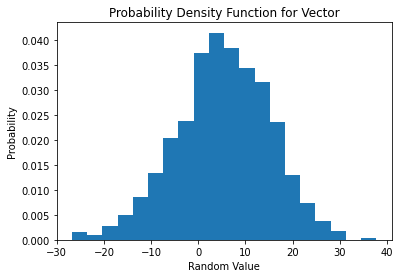

In [3]:
plt.hist(vector, bins=20, density=True)
plt.xlabel('Random Value')
plt.ylabel('Probability')
plt.title('Probability Density Function for Vector')

## Question 2 - Discrete CDF

Create a discrete cumulative density function plot using the same vector as the last question using a line graph.
Annotate the point, $x$, where 80% of the data < $x$ and 20% of the data is greater than $x$.  You can use the matplotlib pyplot function [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) to draw the line, and to draw a star at the point $x$.  Use the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function to annotate the graph. 

In [4]:
np.quantile(vector, 0.8)

13.829502665031132

Text(0.5, 1.0, 'Discrete Cumulative Distribution Function')

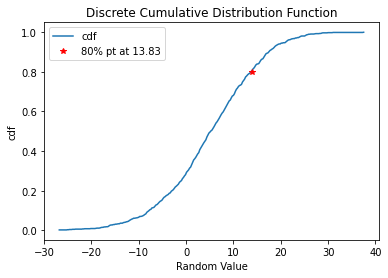

In [5]:
values, base = np.histogram(vector, bins = 300)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative/1000)
plt.plot(13.83, 0.8, 'ro', marker = '*')
plt.legend(['cdf', '80% pt at 13.83'])
plt.xlabel('Random Value')
plt.ylabel('cdf')
plt.title('Discrete Cumulative Distribution Function')

## Question 3 - Univariate Analysis

Load in the data from melb_data.csv into a pandas DataFrame.  Create a box and whisker graph comparing the prices in the suburbs:
  - Reservoir         
  - Richmond          
  - Bentleigh East
  
You should use the [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function, with the parameter `by`. 

In [6]:
labels = ["Reservoir", "Richmond", "Bentleigh East"]
df_reservoir = df[df['Suburb'] == 'Reservoir']
df_richmond = df[df['Suburb'] == 'Richmond']
df_bentleigh = df[df['Suburb'] == 'Bentleigh East']
box_data = [df_reservoir['Price'], df_richmond['Price'], df_bentleigh['Price']]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Boxplot for Prices')

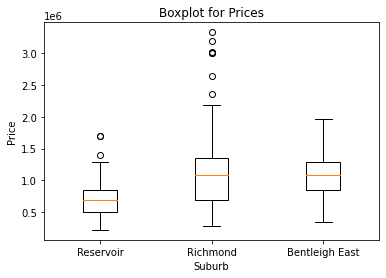

In [7]:
plt.boxplot(box_data)
plt.xticks(np.arange(len(labels))+1,labels)
plt.xlabel('Suburb')
plt.ylabel('Price')
plt.title('Boxplot for Prices')

## Question 4 - Rotation with Matrices

Consider the vectors:
  - $\alpha$ which begins at (0,0) and ends at (1,1)
  - $\beta$ which begins at (1,1) and ends at (0,1)
  
Draw $\alpha$ and $\beta$ using a line graph using a different color for each vector.

Now, using matrix multiplication rotate the vectors 45 degrees (clockwise or counter-clockwise, you choose!) and draw the result.  You must use numpy's [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) to accomplish the rotation. Numpy also has functions for `sin` and `cos`.  You should also get [pi](https://numpy.org/doc/stable/reference/constants.html?highlight=pi#numpy.pi) from the numpy package. 

In [8]:
a = np.array([[0, 1], [0, 1]])
b = np.array([[1, 0], [1, 1]])

Text(0.5, 1.0, 'Two Vectors')

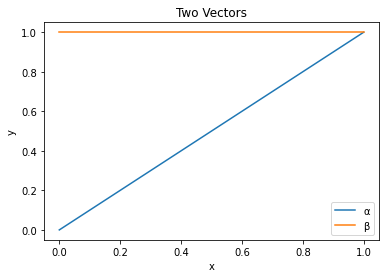

In [9]:
plt.plot([a[0][0], a[0][1]], [a[1][0], a[1][1]])
plt.plot([b[0][0], b[0][1]], [b[1][0], b[1][1]])
plt.legend(['α', 'β'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Two Vectors')

In [10]:
rotation = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)], [np.sin(np.pi/4), np.cos(np.pi/4)]])

In [11]:
a1 = np.matmul(rotation, a)
b = b - 1
b1 = np.matmul(rotation, b)
b1 = b1 + 1

Text(0.5, 1.0, 'Two Vectors Rotated')

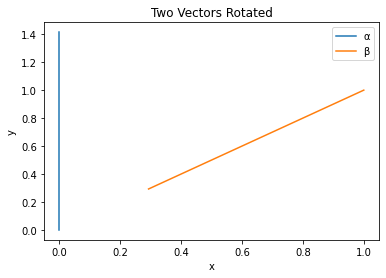

In [12]:
plt.plot([a1[0][0], a1[0][1]], [a1[1][0], a1[1][1]])
plt.plot([b1[0][0], b1[0][1]], [b1[1][0], b1[1][1]])
plt.legend(['α', 'β'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Two Vectors Rotated')

## Question 5 - Solving Systems of Equations with Matrices

Consider the following system of equations:
  - $2x +  y + z = 5$
  - $4x - 6y     = -2$
  - $-2x + 7y + 2z = 9$
  
Convert the coefficients of the system of equations to a matrix, $A$, where the first column contains the $x$ coefficients, the second column contains the $y$ coefficients, and the third column contains the $z$ coefficients. 
Covert the values on the right hand side to a (3,1) vector, $b$, (make sure you keep all the numbers in order.  Now, solve for $(x,y,z)$ by inverting $A$ and multiplying by $b$, eg, $A^{-1} * b$. 

Use the numpy [linear algebra inverse function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to find $A^{-1}$.

In [13]:
A = np.array([[2, 1, 1], [4, -6, 0], [-2, 7, 2]])
b = np.array([5, -2, 9])

In [14]:
np.matmul(np.linalg.inv(A), b)

array([1., 1., 2.])

x = 1, y = 1, and z = 2